# Example 3

In this example, we evolve a list of  stars (in the file [listSin.txt](listSin.txt)) to analyse the BH mass spectrum:

    - We set the DTOUT to  save in output only the initial and final state. 
    - Change  SN models. 
    - We show how to read information from the evolved file and merge them with the information from the output files

- To compile SEVN use the [compile.sh](compile.sh) script
- The run  with the default tables and sn model (rapid) use [run_sse_parsecov05.sh](run_sse_parsecov05.sh)
- To run setting the delayed SN model use [run_sse_parsecov05_delayed.sh](run_sse_parsecov05_delayed.sh), set SNMODE to delayed 
- To run setting the delayed SN model use [run_sse_parsecov05_compactness.sh](run_sse_parsecov05_compactness.sh), set SNMODE to compact 

Remember to set the proper SEVN path in the compile and run scripts

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("sevn_output_parsecov05/output_0.csv")
df

ID             name   Worldtime        Mass  MHE  MCO     Radius  \
0      0  962500789558323    0.000000    2.999967  0.0  0.0   1.442429   
1      0  962500789558323  289.756900    0.774245  0.0  0.0   0.010610   
2      1  625585334604535    0.000000    3.738653  0.0  0.0   1.646064   
3      1  625585334604535  171.296800    0.813993  0.0  0.0   0.010150   
4      2  456460070751908    0.000000    4.477339  0.0  0.0   1.840079   
..   ...              ...         ...         ...  ...  ...        ...   
395  197  751207113052713    2.670607         NaN  NaN  NaN        NaN   
396  198  603307489293497    0.000000  149.161400  0.0  0.0  14.312830   
397  198  603307489293497    2.670282         NaN  NaN  NaN        NaN   
398  199  290716029676835    0.000000  149.899000  0.0  0.0  14.357710   
399  199  290716029676835    2.669957         NaN  NaN  NaN        NaN   

       Luminosity  Temperature  Phase  RemnantType  
0    1.181742e+02     15845.65      1            0  
1    2.570419e+02    224376.60      7            1  
2    2.542968e+02     17965.47      1            0  
3    2.702379e+02    232285.00      7            1  
4    4.706577e+02     19819.13      1            0  
..            ...          ...    ...          ...  
395           NaN          NaN      7           -1  
396  2.401141e+06     60057.63      1            0  
397           NaN          NaN      7           -1  
398  2.419462e+06     60077.76      1            0  
399           NaN          NaN      7           -1  

[400 rows x 11 columns]

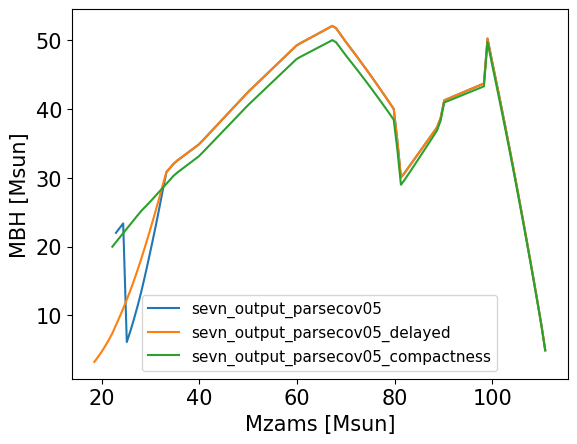

In [9]:
#Create a dataframe with only the data for BH
file="sevn_output_parsecov05"
dft=pd.read_csv(f"{file}/output_0.csv")
df=dft[dft.RemnantType==6]
#Now load the initial condition of the stars 
dfe=pd.read_csv(f"{file}/evolved_0.dat",sep="\s+")[["name","Mass"]]
df=df.merge(dfe, on="name", how="inner")
plt.plot(df.Mass_y,df.Mass_x,label=file)

file="sevn_output_parsecov05_delayed"
dft=pd.read_csv(f"{file}/output_0.csv")
df=dft[dft.RemnantType==6]
#Now load the initial condition of the stars 
dfe=pd.read_csv(f"{file}/evolved_0.dat",sep="\s+")[["name","Mass"]]
#Merge together
df=df.merge(dfe, on="name", how="inner")
plt.plot(df.Mass_y,df.Mass_x,label=file)

file="sevn_output_parsecov05_compactness"
dft=pd.read_csv(f"{file}/output_0.csv")
df=dft[dft.RemnantType==6]
#Now load the initial condition of the stars 
dfe=pd.read_csv(f"{file}/evolved_0.dat",sep="\s+")[["name","Mass"]]
df=df.merge(dfe, on="name", how="inner")
plt.plot(df.Mass_y,df.Mass_x,label=file)

plt.xlabel("Mzams [Msun]",fontsize=15)
plt.ylabel("MBH [Msun]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=11)